In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/telco_churn.csv')
pd.set_option('Display.max_columns',200)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Routine structure check

In [5]:
df.shape

(7043, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Mean Monthly charges is about 64.76 units and 75% of observations are monthly charged around 89.85.
The maximum tenure is 72 months with mean being about 32 months.
About 50% of customers stayed for 55 months tenure and were charged 70.3 per month.
To get more relevant information, we will visualize attributes of the data and distribution of target variable(Churn)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#Dividing the Dataframe into two parts churn and non-churn.
df_yes = df[df['Churn']=='Yes']
df_no = df[df['Churn']=='No']

In [14]:
#Customer who churned
df_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [129]:
##Customer who did not churn
df_no.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


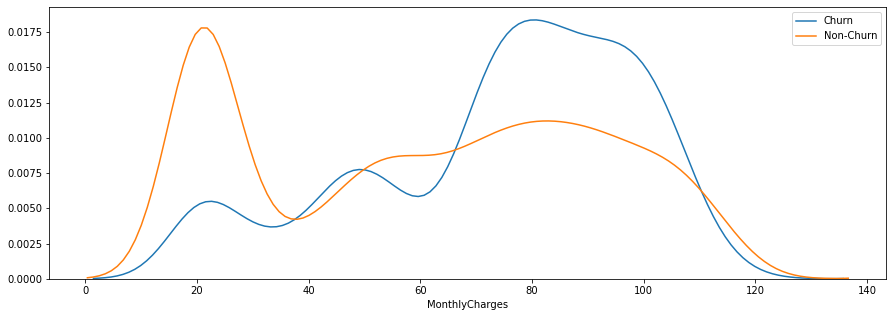

In [16]:
plt.figure(figsize = (15, 5))
sns.distplot(df_yes['MonthlyCharges'], hist=False, label='Churn')
sns.distplot(df_no['MonthlyCharges'], hist=False, label='Non-Churn')

There is peak at 60-120 monthly charges those who belong to churn.
There are more number of people in the range who pay 0-40 and 60-120 who belong to non churn category.

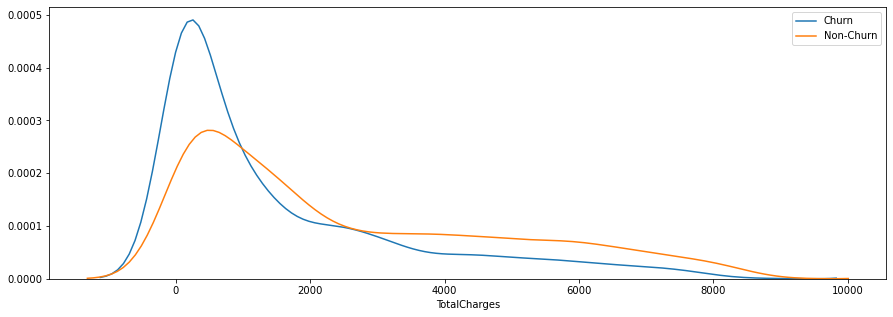

In [17]:
plt.figure(figsize = (15, 5))
sns.distplot(df_yes['TotalCharges'], hist=False, label='Churn')
sns.distplot(df_no['TotalCharges'], hist=False, label='Non-Churn')

People with total charges 500 and 2500 and between 4000 to 8000 tend to churn less.
Customer who pay between 0-2000 churn more

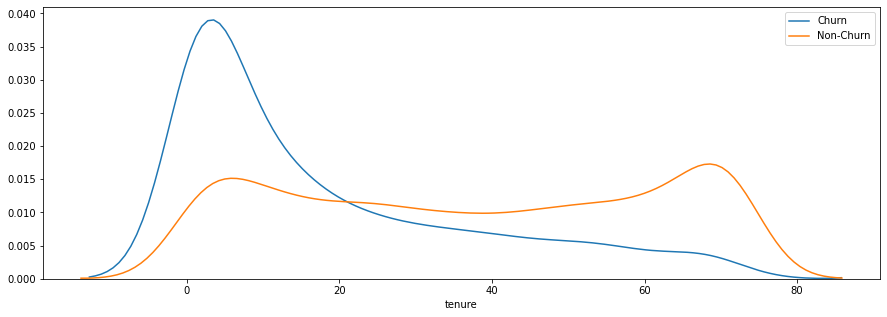

In [18]:
plt.figure(figsize = (15, 5))
sns.distplot(df_yes['tenure'], hist=False, label='Churn')
sns.distplot(df_no['tenure'], hist=False, label='Non-Churn')

Customer with tenure between 0 to 20 months churn more.
Customer with churning longer tenure have lower churning rate. 

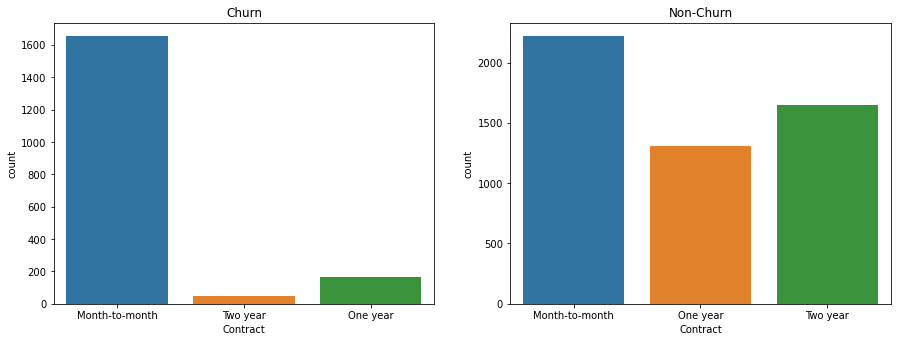

In [20]:
plt.figure(figsize=(15,30))
plt.subplot(5,2,1)
plt.title("Churn")
sns.countplot('Contract', data=df_yes)
plt.subplot(5,2,2)
plt.title("Non-Churn")
sns.countplot('Contract', data=df_no)

There is a slight increase in month to month plan in non churn category but we see major increase in Two year contract and one year contract in Non churn than in churning category.

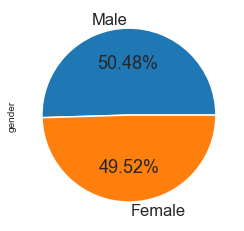

In [100]:
df['gender'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')

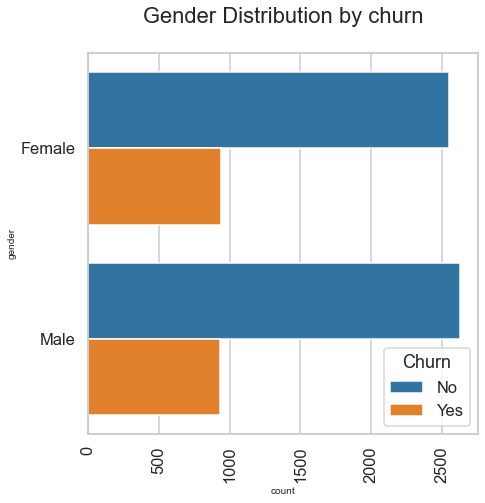

In [103]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Gender Distribution by churn")
sns.countplot(data = df, y='gender',hue = 'Churn',orient='v')

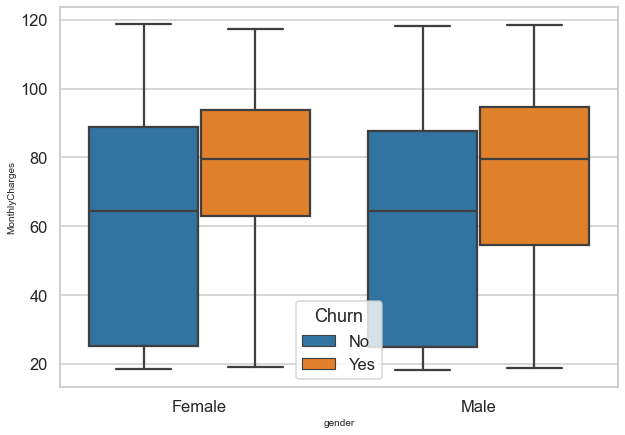

In [104]:
plt.figure(figsize=(10,7))
sns.boxplot(x="gender", y="MonthlyCharges", data=df, hue='Churn')

#### Gender Conclusion: Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn


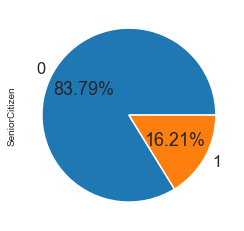

In [106]:
df['SeniorCitizen'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')

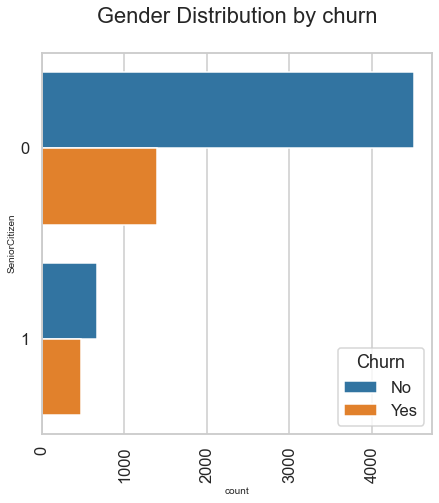

In [107]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Gender Distribution by churn")
ax = sns.countplot(data = df, y='SeniorCitizen', 
                order=df['SeniorCitizen'].value_counts().index,hue = 'Churn')

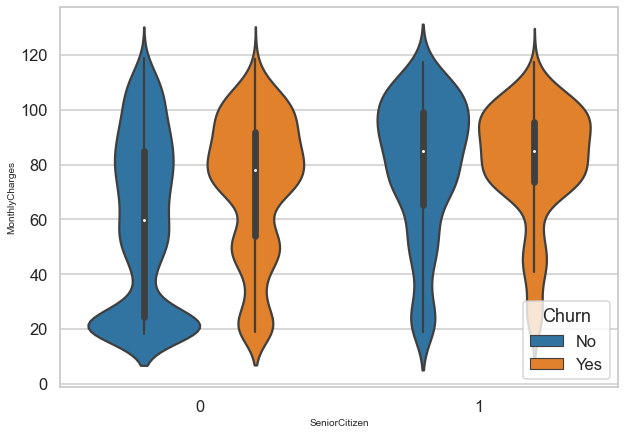

In [108]:
plt.figure(figsize=(10,7))
sns.violinplot(x="SeniorCitizen", y="MonthlyCharges", data=df, hue='Churn')

Age Conclusion:

    Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)
    Overall, more non-senior citizens churn than senior citizens
    A higher proportion of senior citizens churn than non-senior citizen

### Partner and Dependents

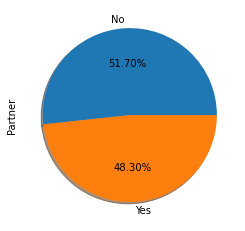

In [46]:
df['Partner'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%',shadow=True)

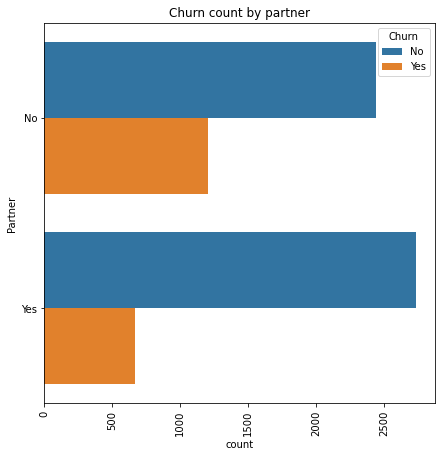

In [51]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Churn count by partner")
ax = sns.countplot(data = df, y='Partner', 
                order=df['Partner'].value_counts().index,hue = 'Churn')

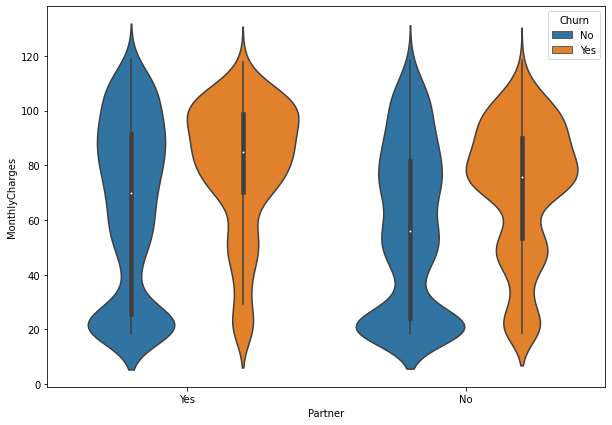

In [52]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Partner", y="MonthlyCharges", data=df, hue='Churn')

Partner Conclusions:
Overall, those without partners are more likely to churn than those with partners

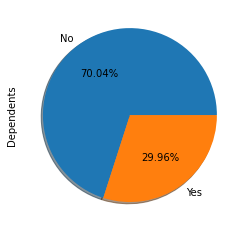

In [45]:
df['Dependents'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%',shadow=True)

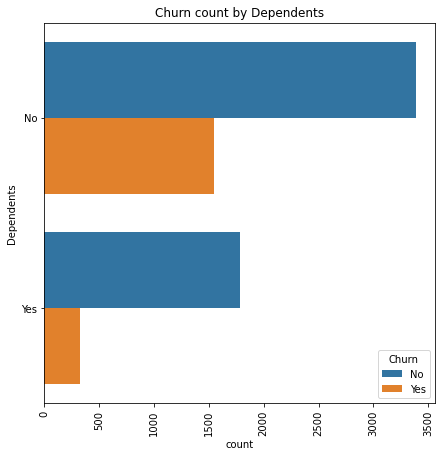

In [55]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Churn count by Dependents")
ax = sns.countplot(data = df, y='Dependents', 
                order=df['Dependents'].value_counts().index,hue = 'Churn')

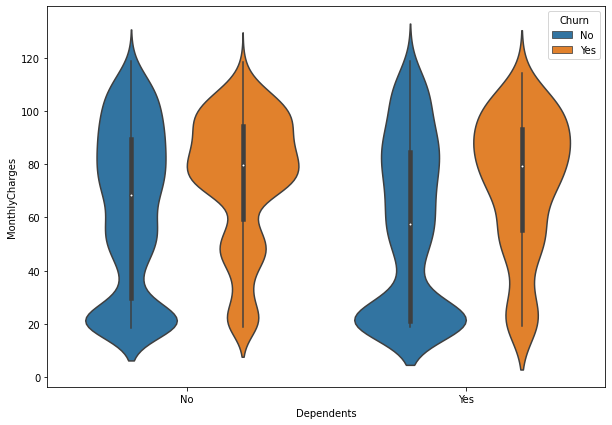

In [57]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Dependents", y="MonthlyCharges", data=df, hue='Churn')

Customers without dependents are more likely to churn than those with dependents

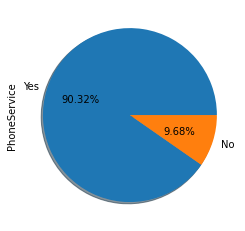

In [59]:
df['PhoneService'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%',shadow=True)

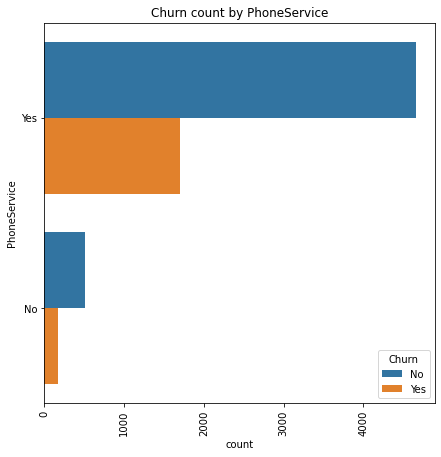

In [63]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Churn count by PhoneService")
ax = sns.countplot(data = df, y='PhoneService', 
                order=df['PhoneService'].value_counts().index,hue = 'Churn')

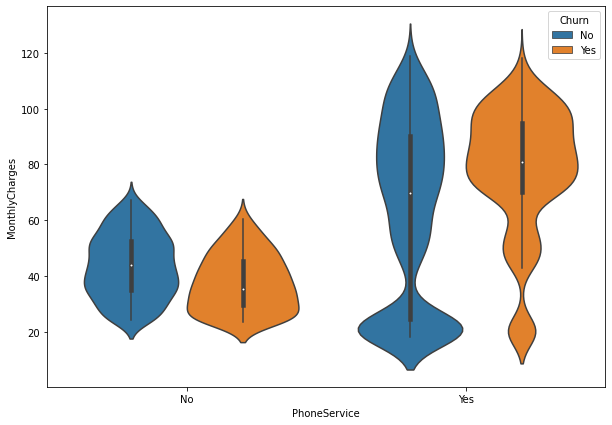

In [64]:
plt.figure(figsize=(10,7))
sns.violinplot(x="PhoneService", y="MonthlyCharges", data=df, hue='Churn')

In [72]:
df['MultipleLines'] = df['MultipleLines'].replace('Yes','Multiple')
df['MultipleLines'] = df['MultipleLines'].replace('No','Singule')

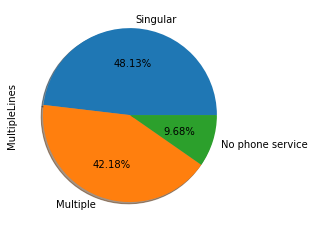

In [74]:
df['MultipleLines'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

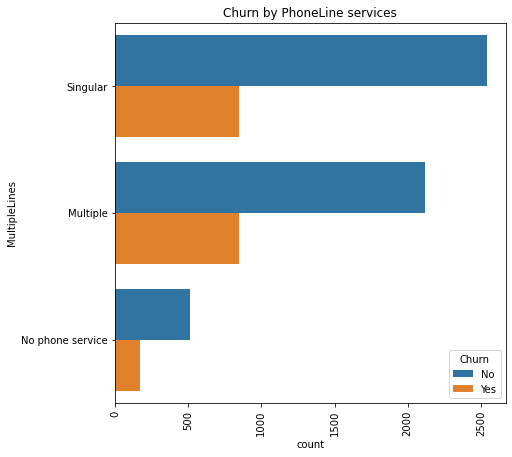

In [76]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Churn by PhoneLine services")
ax = sns.countplot(data = df, y='MultipleLines', 
                order=df['MultipleLines'].value_counts().index,hue = 'Churn')

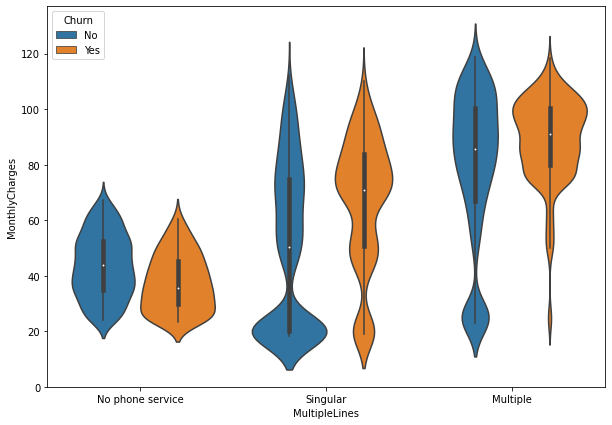

In [77]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MultipleLines", y="MonthlyCharges", data=df, hue='Churn')

Phone Service Conclusions:

    Significantly more customers with only phone service will not churn than those other customers.
    People with only phone service churn ~25% of the time.
    Customers with phone services only pay a higher average monthly charge.
    Customers with multiple lines churn at approximately the same rate as those with a singular line.
    Customers with multiple lines more frequently pay a higher monthly charge than those with singular phone    lines.

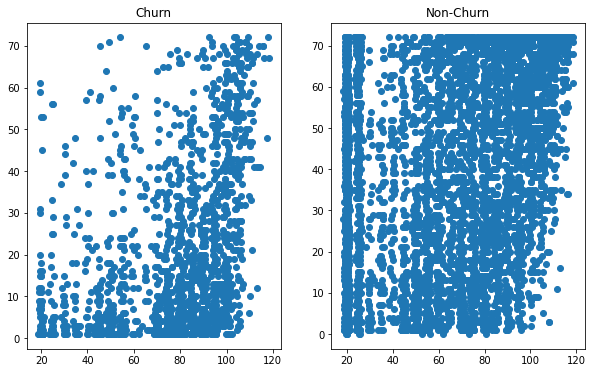

In [78]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Churn')
plt.scatter(df_yes['MonthlyCharges'],df_yes['tenure'])
plt.subplot(1,2,2)
plt.title('Non-Churn')
plt.scatter(df_no['MonthlyCharges'],df_no['tenure'])

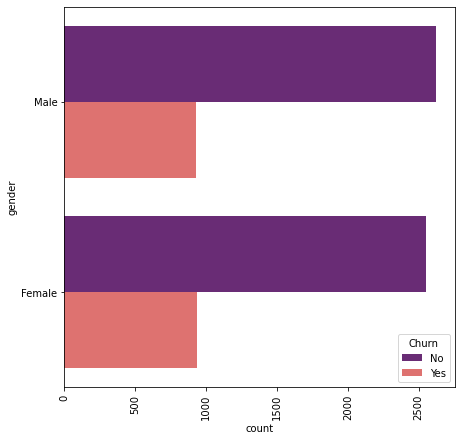

In [79]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
ax = sns.countplot(data = df, y='gender', 
                   order=df['gender'].value_counts().index,hue = 'Churn',palette='magma')

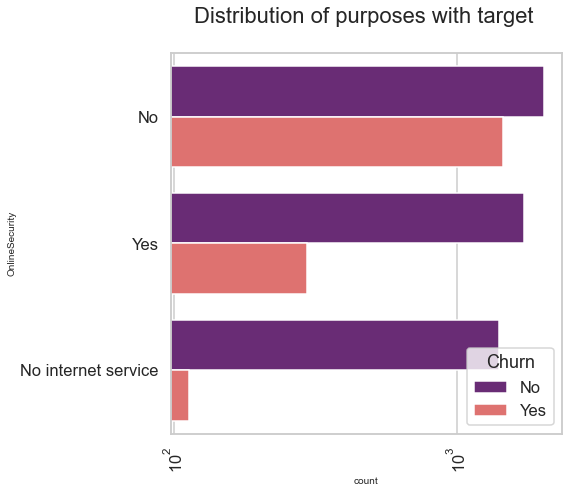

In [80]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(7,7))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = df, y= 'OnlineSecurity', 
                   order=df['OnlineSecurity'].value_counts().index,hue = 'Churn',palette='magma')

There is no relation between Monthly charges and tenure.

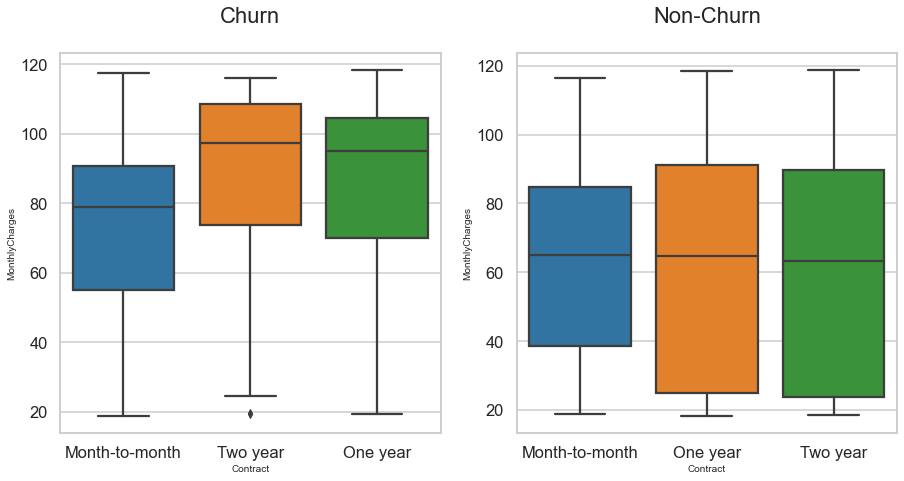

In [125]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Churn')
sns.boxplot(x='Contract',y='MonthlyCharges',data=df_yes)
plt.subplot(1,2,2)
plt.title('Non-Churn')
sns.boxplot(x='Contract',y='MonthlyCharges', data=df_no)

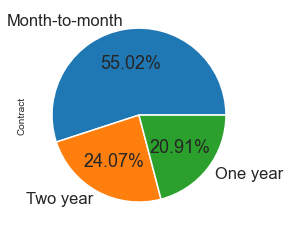

In [128]:
df['Contract'].value_counts().plot.pie(autopct='%1.2f%%')

## Contract Conclusion:

    More than half of customers use a monthly payment option.
    
    Significantly more customers churn on monthly plans.
    
    The longer the plan, the lower the churn rate.
    Monthly charges are generally higher the longer the contract is

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

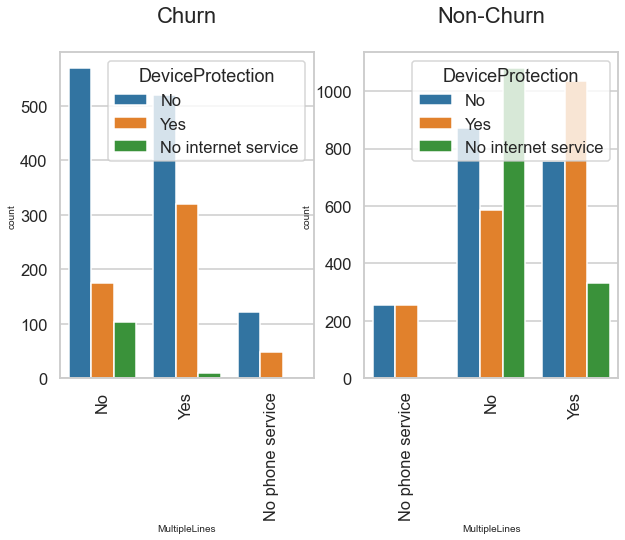

In [82]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Churn')
sns.countplot(x='MultipleLines',hue='DeviceProtection',data=df_yes)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Churn')
sns.countplot(x='MultipleLines',hue='DeviceProtection', data=df_no)
plt.xticks(rotation=90)

Customer with no multiple lines and no internet are almost double in non churn category.

The number of customers in Non-churn category is high, with device protection but no internet services.

People with device protection is high in Non-churn category.

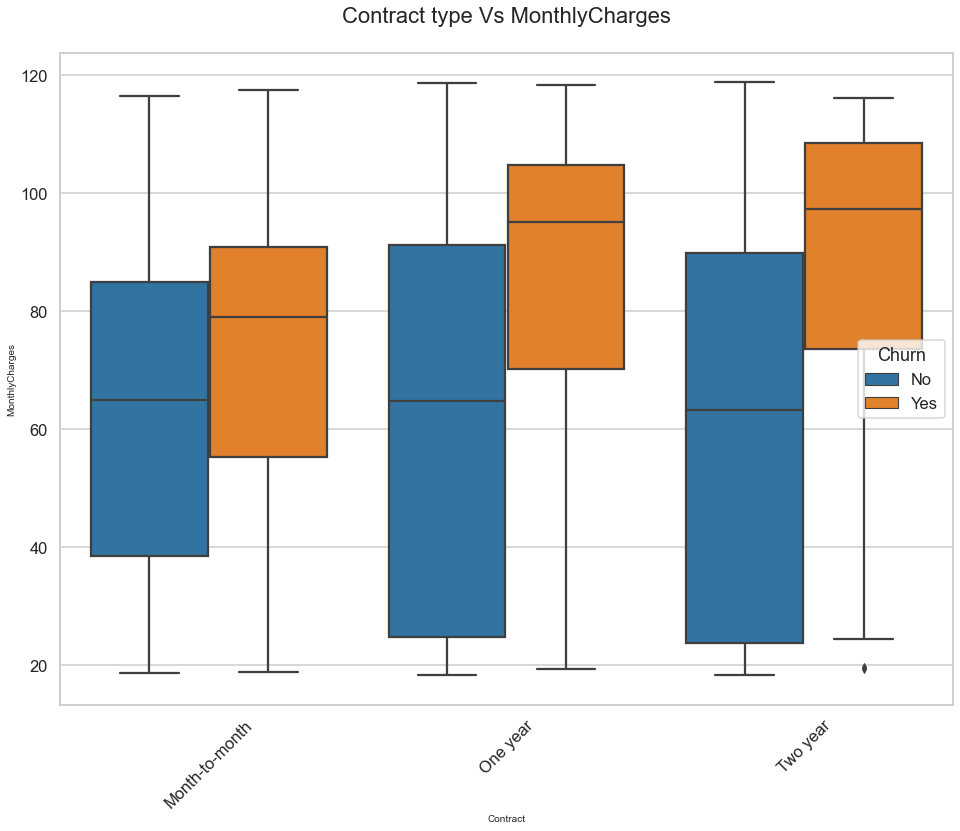

In [88]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='Contract',y='MonthlyCharges', hue ='Churn',orient='v')
plt.title('Contract type Vs MonthlyCharges')
plt.show()

People who belong to two year contract and pay more monthly charges churn more

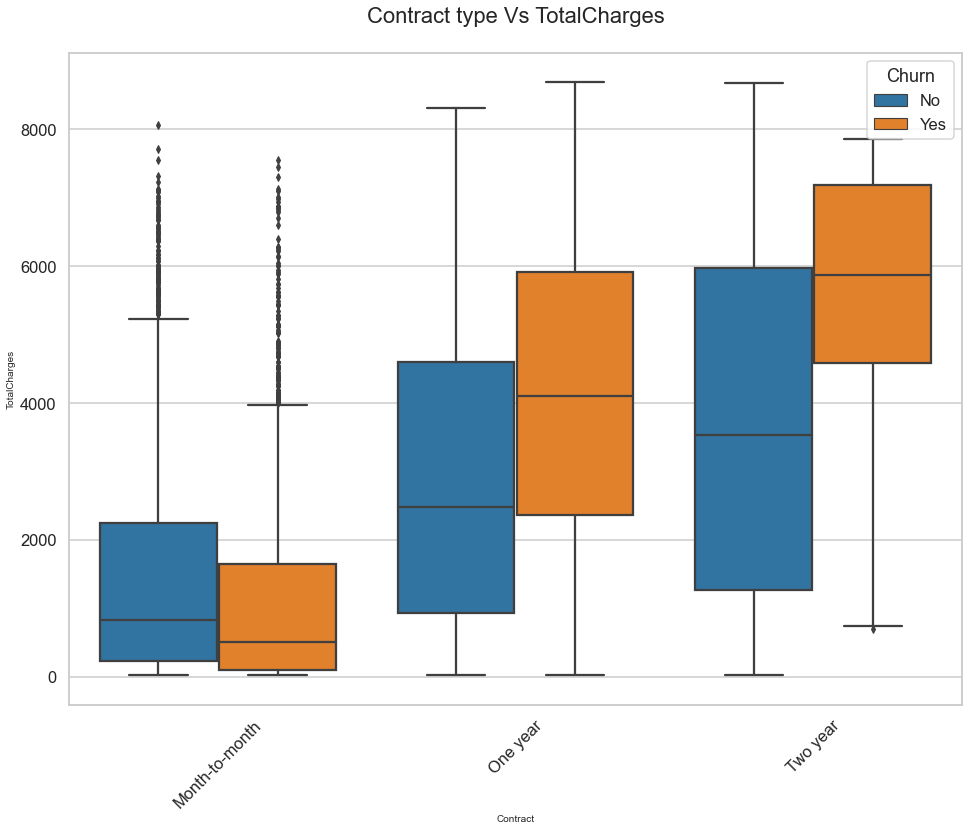

In [98]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='Contract',y='TotalCharges', hue ='Churn',orient='v')
plt.title('Contract type Vs TotalCharges')
plt.show()

People with OnlineSecurity and No internet services tend to churn less

## PaperLess Billing & Payment Menthods

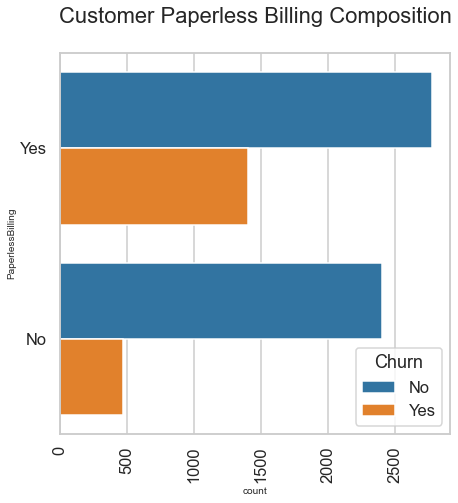

In [115]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Customer Paperless Billing Composition")
ax = sns.countplot(data = df, y='PaperlessBilling', 
                order=df['PaperlessBilling'].value_counts().index,hue = 'Churn')

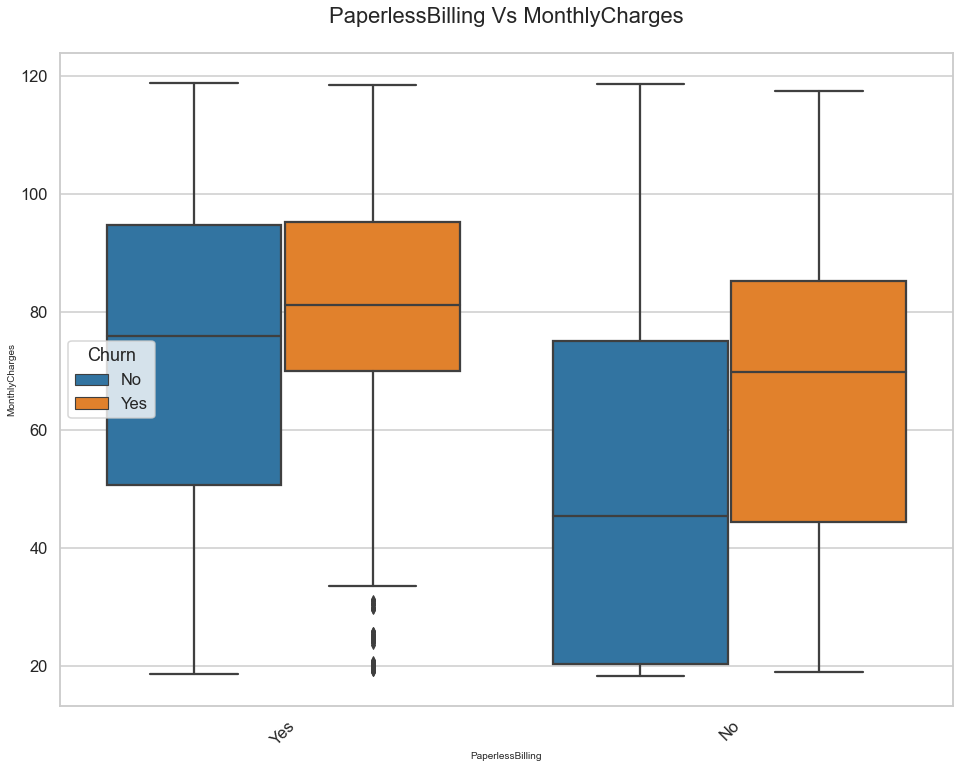

In [121]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='PaperlessBilling',y='MonthlyCharges', hue ='Churn',orient='v')
plt.title('PaperlessBilling Vs MonthlyCharges')
plt.show()

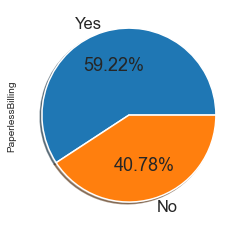

In [117]:
df['PaperlessBilling'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

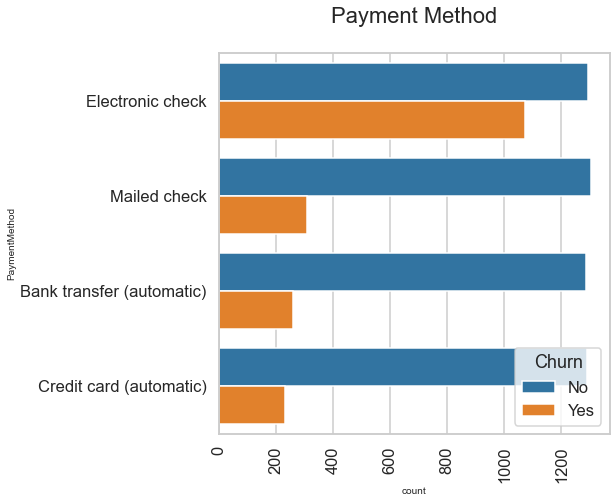

In [124]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Payment Method")
ax = sns.countplot(data = df, y='PaymentMethod', 
                order=df['PaymentMethod'].value_counts().index,hue = 'Churn')

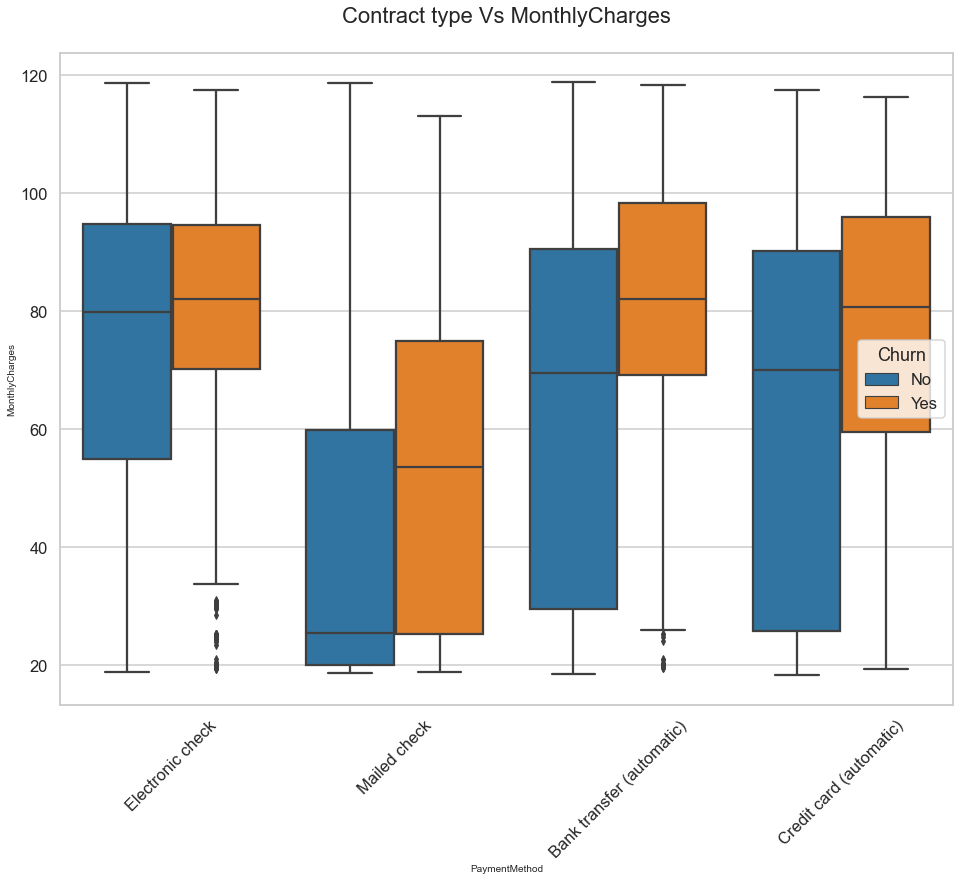

In [122]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='PaymentMethod',y='MonthlyCharges', hue ='Churn',orient='v')
plt.title('Contract type Vs MonthlyCharges')
plt.show()

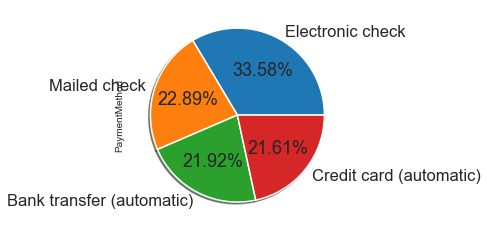

In [119]:
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

Payments Conclusions:
Customers with non-paperless billing churn almost 15% more than paperless customers.

Paperless customers churn at similar rates as non-paperless customers when the monthly price is below 60 dollars, once above 60 more paperless customers churn than non-paperless

Customers who pay with e-check churn more than 10% than customers with all other payment methods

Customers who pay by credit card have consistent churn rates regardless of monthly charge, whereas customers paying by bank transfer, e-chcek, or mailed check all see an up-tick in churn once monthly charges rise above 60.

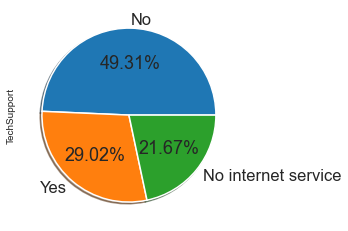

In [130]:
df['TechSupport'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

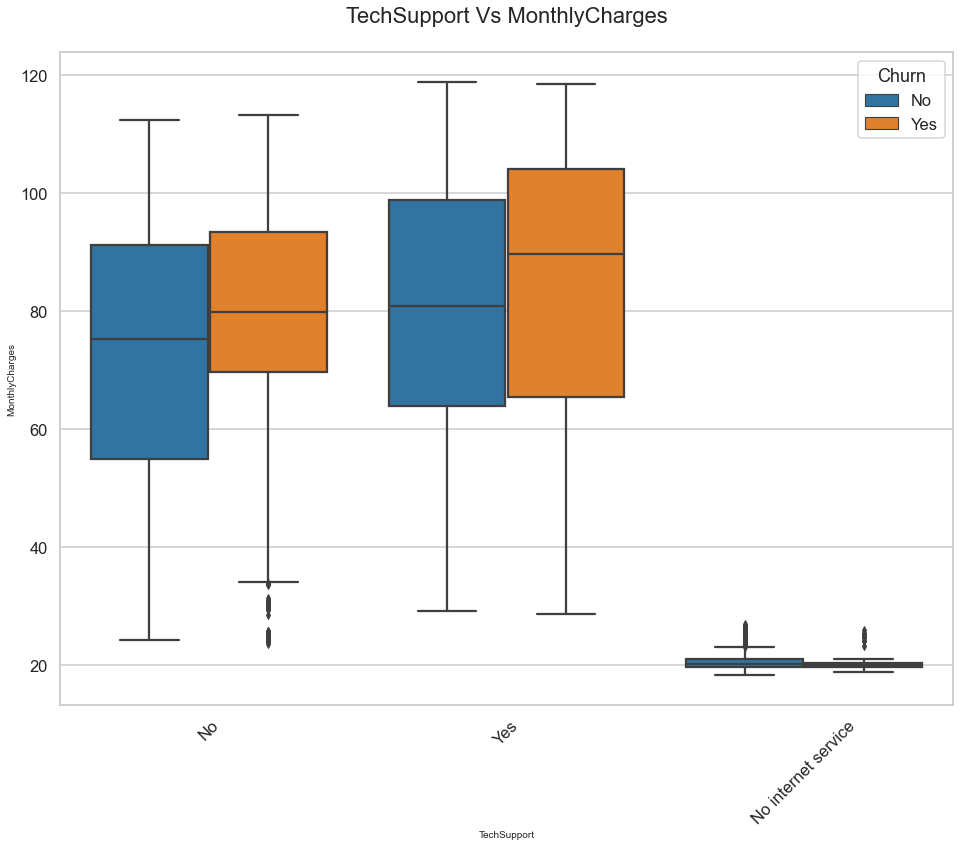

In [132]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='TechSupport',y='MonthlyCharges', hue ='Churn',orient='v')
plt.title('TechSupport Vs MonthlyCharges')
plt.show()

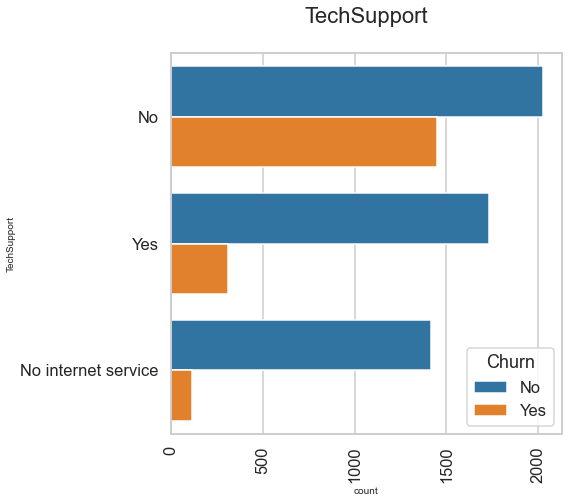

In [135]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("TechSupport")
ax = sns.countplot(data = df, y='TechSupport', 
                order=df['TechSupport'].value_counts().index,hue = 'Churn')

Almost 30 % of customer opted for tech support.

People opting for tech support have less churning rate than the ones who have not opted for tech support.

People with tech Support pay 10 to 12 dollars more than people with no support